<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
__GCD Term-4 Project Report on EMAIL FILTERING MODEL__ 

__Susanta Kumar Labala__ 

__17/03/2019__ 


### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
- 4. [Preprocessing](#section4)</br>
- 5. [Feature Transformation/Engineering](#section5)</br>
    - 5.1 [Most frequent words in ham/spam messages](#section501)<br/>
    - 5.2 [Most frequent words in ham/spam messages](#section502)<br/>
    - 5.3 [Length of ham and spam messages](#section503)<br/>     
- 6. [Modeling and Predictions](#section6)</br>
     - 6.1 [Multinomial Naive Bayes Model](#section601)<br/>
     - 6.2 [SVM Model](#section602)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a>
## 1. Problem Statement !
__Using spam dataset to build a prediction model that will accurately classify which email texts are spam.__

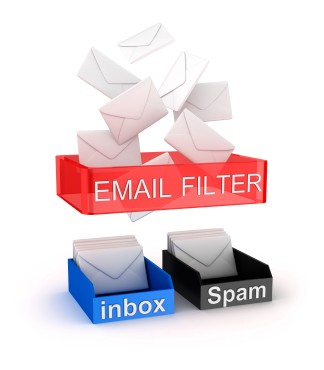

<a id=section101></a> 
### 1.1. Introduction
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

Choosen Naive bayes classifier and a SVM to classify messages as spam or not spam. 
     

<a id=section102></a> 
### 1.2. Data source and dataset (INSAID)

 https://github.com/insaid2018/Term-2/tree/master/Projects/house_data.csv

<a id=section2></a> 
### 2. Load the packages and data 

In [2]:
# Import packages
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Ignore warning related to pandas_profiling
import warnings                                                                
warnings.filterwarnings('ignore') 

#Load the spam dataset 
spam_data=pd.read_csv(r"https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/spam.csv",encoding='latin-1')

 

<a id=section3></a> 
### 3. Data Profiling
__Unnderstanding the Spam Dataset__

<a id=section301></a> 
### 3.1. dtypes:

In [3]:
# Display the data type for each variable
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [4]:
# print the number of rows and comlumns of the Data Frame
spam_data.shape

(5572, 5)

<a id=section302></a> 
### 3.2. head :

In [5]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<a id=section302></a>

In [6]:
# there are three empty columns, these should be removed. 
# also rename the columns as "v1"  as class and "v2" as text 
spam_data = spam_data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_data = spam_data.rename(columns={"v1":"class", "v2":"text"})
spam_data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<a id=section4></a> 
### 4. Preprocessing:

In [7]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [8]:
import nltk
#nltk.download('stopwords')
textFeatures = spam_data['text']
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, spam_data['class'], test_size=0.3, random_state=111)

<a id=section5></a> 
### 5. Feature Transformation/Engineering
  

<a id=section501></a> 
### 5.1. Distribution of ham/spam emails :

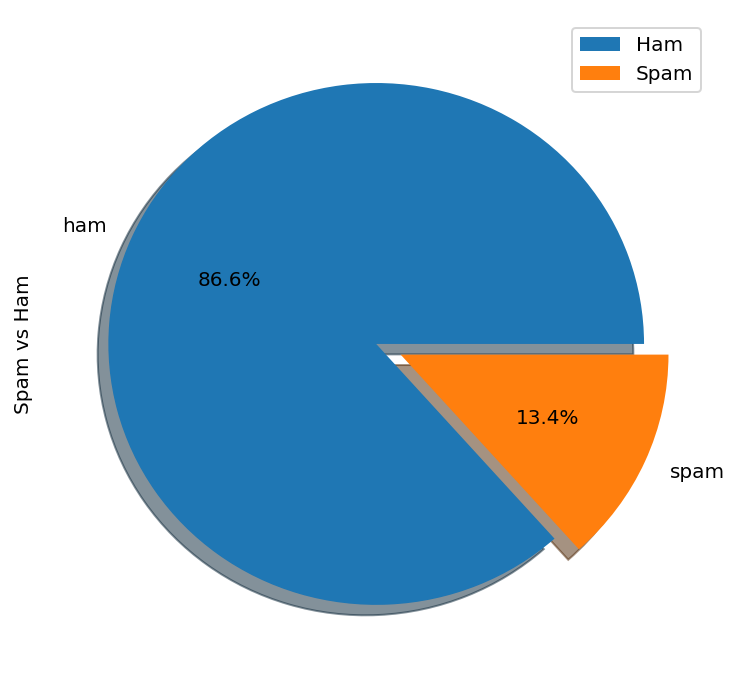

In [9]:
spam_data["class"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

<a id=section502></a> 
### 5.2. Most frequent words in ham/spam messages :

In [10]:
count1 = Counter(" ".join(spam_data[spam_data['class']=='ham']["text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(spam_data[spam_data['class']=='spam']["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

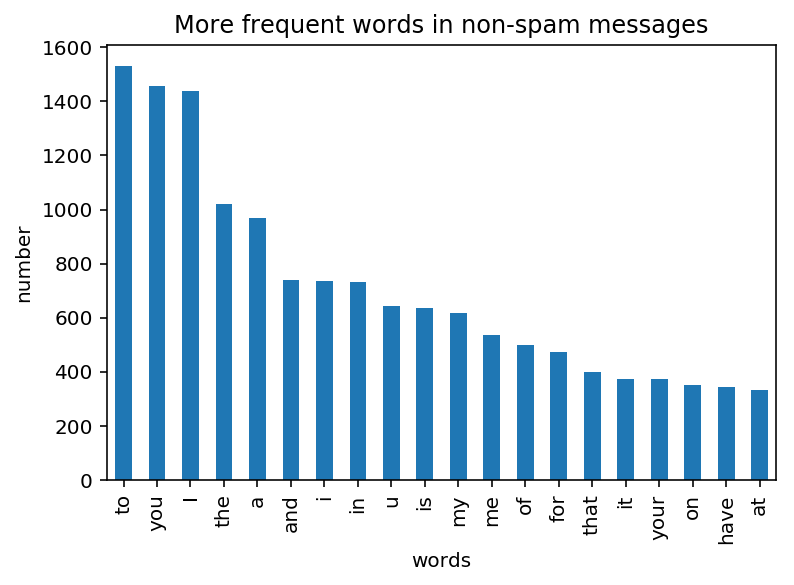

In [11]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

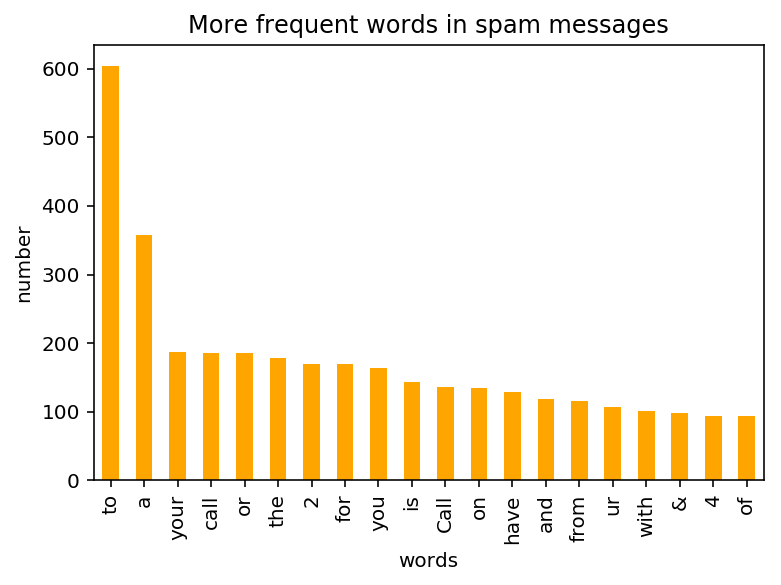

In [12]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

The majority of frequent words in both classes are stop words such as 'to', 'a', 'or' and so on. Which are common words in a language, there is no single universal list of stop words

<a id=section503></a> 
### 5.3. Length of ham and spam messages :

In [13]:
#Add the length field
spam_data['length'] = spam_data['text'].apply(len)
spam_data.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017803417438>,
      dtype=object)

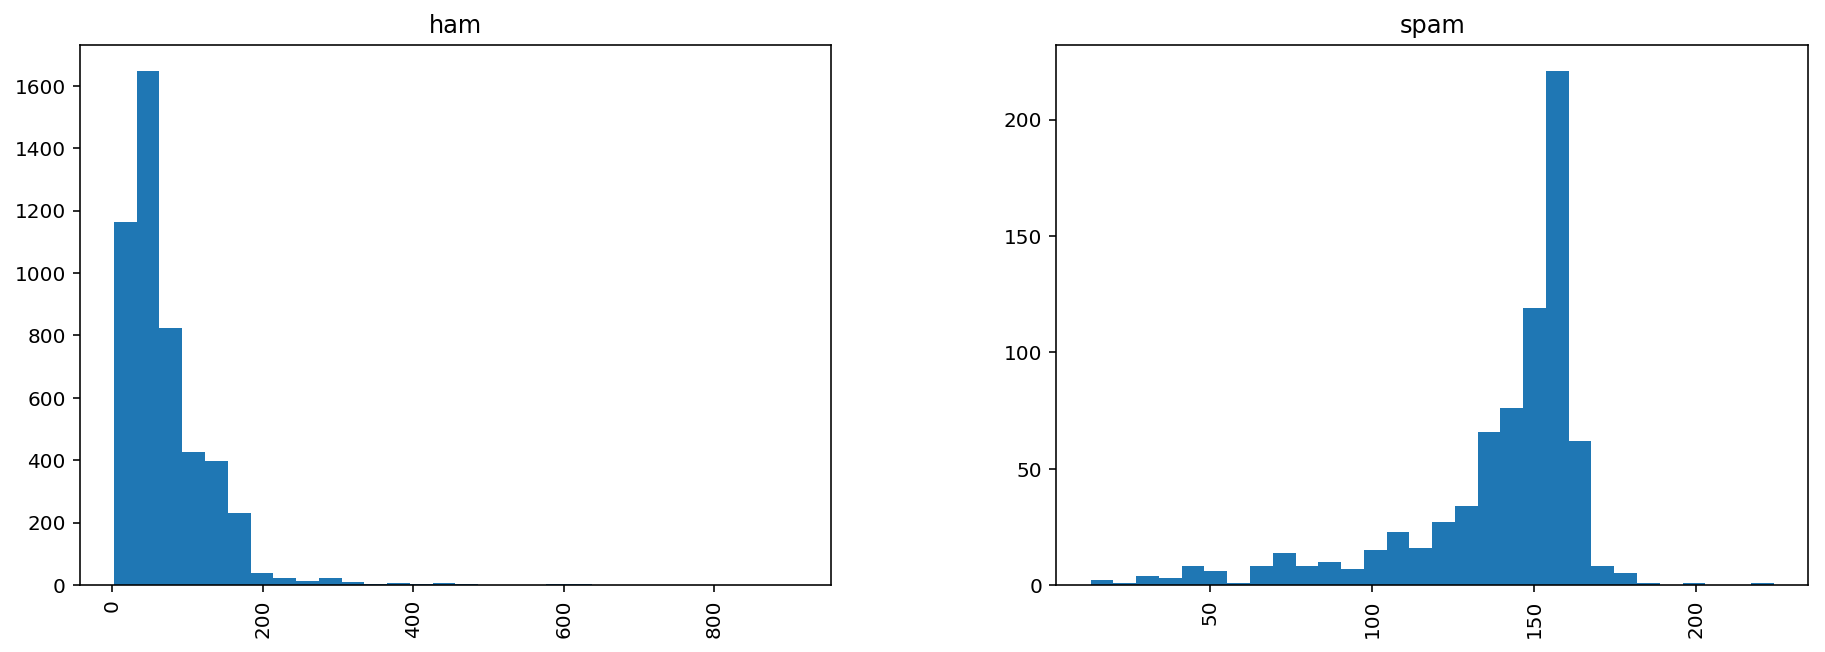

In [14]:
 #Plotting the lenght of ham and spam messages
spam_data.hist(by='class',column='length',bins=30,figsize=[15,5])

<a id=section6></a>
### 6. Modeling and Predictions
 

<a id=section601></a> 
### 6.1.Multinomial Naive Bayes Model

In [17]:
# trains and test a Multinomial Naive Bayes Model using sklearn.
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
accuracy_score(labels_test,prediction)

0.9850478468899522

<a id=section602></a>
### 6.2. SVM Model

In [18]:
# trains and tests to SVM model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)

0.9784688995215312

<a id=section7></a>
### Conclussion